In [3]:
#reference
#https://machinelearningmastery.com/multi-output-regression-models-with-python/

In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv("wrangled_data.csv")
df.head()

,Unnamed: 0,time_created,username,message,sentiment,derived_sentiment,stock_price
0,0,2021-11-06 14:34:31+00:00,arya_stark,Distribution of Annual Percentage Change in $S...,NaN,Bullish,151.088
1,1,2021-11-06 14:34:21+00:00,All_In_Tesla,$SPY why do we keep saying Wendy is for people...,Bullish,Bullish,151.088
2,2,2021-11-06 14:17:57+00:00,All_In_Tesla,$SPY this stock market send all bears back to ...,Bullish,Bullish,151.088
3,3,2021-11-06 14:00:27+00:00,LegalizeCannabisNow,$FSR $LCID $TSLA $AAPL $NIO \nhttps://youtu.be...,Bullish,Bearish,151.088
4,4,2021-11-06 13:59:20+00:00,LegalizeCannabisNow,$FSR $AAPL $TSLA $LCID $NIO 🙋☕,Bullish,Bearish,151.088


In [15]:
print(df.shape)
print(df.columns)

(41220, 7)
Index(['Unnamed: 0', 'time_created', 'username', 'message', 'sentiment',
       'derived_sentiment', 'stock_price'],
      dtype='object')


In [16]:
df.isnull().values.any()
df = df.dropna()
df.shape

(20101, 7)

In [19]:
df.index = pd.to_datetime(df['time_created'])
df.head()

,Unnamed: 0,time_created,username,message,sentiment,derived_sentiment,stock_price
time_created,,,,,,,
2021-11-06 14:34:21+00:00,1,2021-11-06 14:34:21+00:00,All_In_Tesla,$SPY why do we keep saying Wendy is for people...,Bullish,Bullish,151.088
2021-11-06 14:17:57+00:00,2,2021-11-06 14:17:57+00:00,All_In_Tesla,$SPY this stock market send all bears back to ...,Bullish,Bullish,151.088
2021-11-06 14:00:27+00:00,3,2021-11-06 14:00:27+00:00,LegalizeCannabisNow,$FSR $LCID $TSLA $AAPL $NIO \nhttps://youtu.be...,Bullish,Bearish,151.088
2021-11-06 13:59:20+00:00,4,2021-11-06 13:59:20+00:00,LegalizeCannabisNow,$FSR $AAPL $TSLA $LCID $NIO 🙋☕,Bullish,Bearish,151.088
2021-11-06 13:57:52+00:00,5,2021-11-06 13:57:52+00:00,Modest_Investor_18,@swingeveryday @Andreas2112 @RichardSimmons1 $...,Bullish,Bearish,151.088


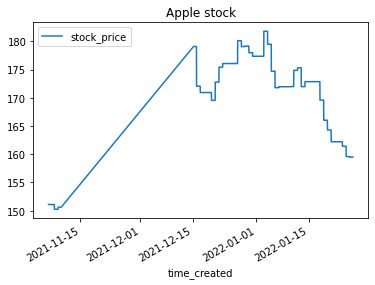

In [21]:
dr = df[['stock_price']]
dr.plot()
plt.title('Apple stock');

In [22]:
df[["stock_price"]].head()



,stock_price
time_created,
2021-11-06 14:34:21+00:00,151.088
2021-11-06 14:17:57+00:00,151.088
2021-11-06 14:00:27+00:00,151.088
2021-11-06 13:59:20+00:00,151.088
2021-11-06 13:57:52+00:00,151.088


Text(0.5, 1.0, 'Cummulative Open/Close Apple Stock Price')

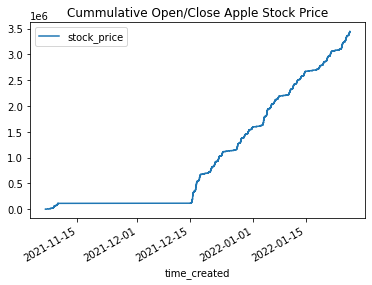

In [23]:
df[["stock_price"]].cumsum().plot()
plt.title("Cummulative Open/Close Apple Stock Price")

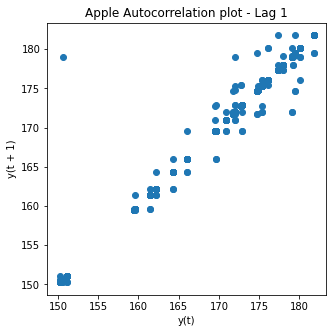

In [24]:


# START_CODE_HERE - plot the Autocorrelation plot for feature 'Open'
from pandas.plotting import lag_plot

plt.figure(figsize=(5,5))
lag_plot(df['stock_price'], lag=1)
plt.title('Apple Autocorrelation plot - Lag 1');
# END_CODE_HERE



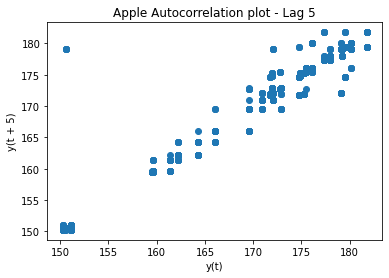

In [25]:
lag_plot(df['stock_price'], lag=5)
plt.title('Apple Autocorrelation plot - Lag 5');

In [26]:
train_data, test_data = df.iloc[0:int(len(df)*0.8), :], df.iloc[int(len(df)*0.8):, :]

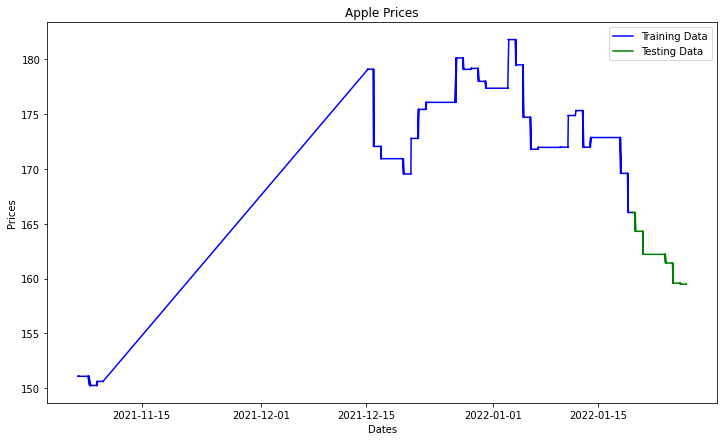

In [27]:
plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['stock_price'], 'blue', label='Training Data')
plt.plot(test_data['stock_price'], 'green', label='Testing Data')
plt.legend();

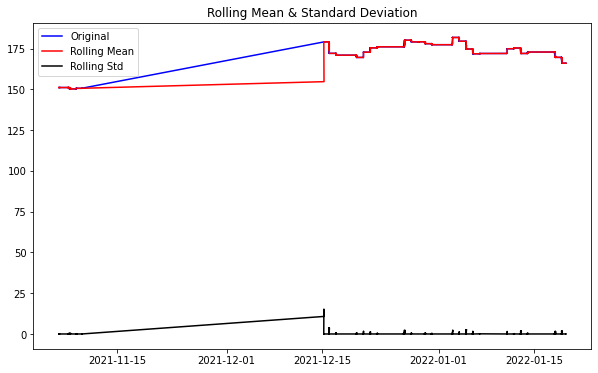

In [28]:
window = 7
train_series = train_data['stock_price']

#Determing rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');    

In [29]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(train_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                    -3.587998
p-value                            0.005995
#Lags Used                        14.000000
Number of Observations Used    16065.000000
Critical Value (1%)               -3.430757
Critical Value (5%)               -2.861720
Critical Value (10%)              -2.566866
dtype: float64

In [30]:
train_diff = train_series.diff(periods=1)
train_diff = train_diff.dropna(inplace = False)

Text(0.5, 1.0, 'stock price Mean/Std over a 7 day rolling window')

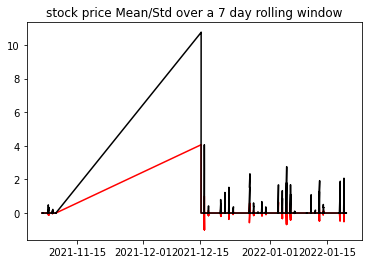

In [31]:
#Determing rolling statistics
train_diff_mean = train_diff.rolling(7).mean()
train_diff_std = train_diff.rolling(7).std()

#Plot rolling statistics:
plt.plot(train_diff_mean, color="red", label="mean")
plt.plot(train_diff_std, color="black", label="std")
plt.title("stock price Mean/Std over a 7 day rolling window")

In [32]:
dftest_1d = adfuller(train_diff, autolag='AIC')
dfoutput_1d = pd.Series(dftest_1d[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest_1d[4].items():
    dfoutput_1d['Critical Value (%s)'%key] = value
dfoutput_1d

Test Statistic                   -34.979844
p-value                            0.000000
#Lags Used                        13.000000
Number of Observations Used    16065.000000
Critical Value (1%)               -3.430757
Critical Value (5%)               -2.861720
Critical Value (10%)              -2.566866
dtype: float64

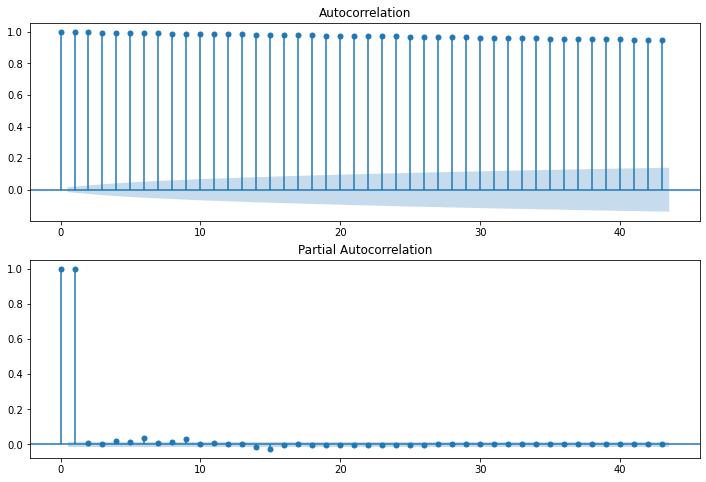

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_series, ax=ax[0]); # 
plot_pacf(train_series, ax=ax[1]);

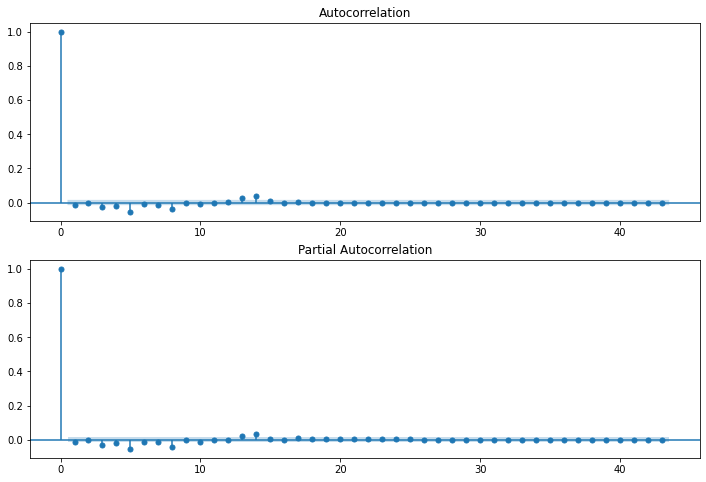

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_diff, ax=ax[0]); # 
plot_pacf(train_diff, ax=ax[1]);

In [36]:
test_series = test_data['stock_price']
test_diff = test_series.diff(periods=1)
test_diff = test_diff.dropna(inplace = False)

In [37]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [38]:
%%time 

#history = [x for x in train_diff]
history = [x for x in train_series]  # using ARIMA forecast approach


predictions = list()
#for t in range(len(test_diff)):  ## with predict approach
for t in range(test_series.shape[0]): ## Alternate apporach with forecast approach

    # START_CODE_HERE - call the ARIMA Method with history and params
#    model = ARIMA(history, order=(5,1,0))  # initialize the model if diff data is passed then d should be 0
    model = ARIMA(history, order=(5,1,0))  # initialize the model with history and right order of parameters using Forecast approach
    model_fit = model.fit()  # fit the model 
    # END_CODE_HERE

#    output = model_fit.predict((len(history)+t))  # return the diff value
    output = model_fit.forecast() # Alternate approach using forecast
    yhat = output[0]   # **This was incorrect in template output[0][0]
    predictions.append(yhat)

#    obs = test_diff[t]
    obs = test_series[t]   # alternate approach using forecast which return the actual value
    history.append(obs)    # **NOTE** - adding the test data to history to forecast the next value.

    if t % 100 == 0:
      print('Test Series Point: {}\tPredicted={}, Expected={}'.format(t, yhat, obs))

Test Series Point: 0	Predicted=[166.01904209], Expected=166.018
Test Series Point: 100	Predicted=[166.01903567], Expected=166.018
Test Series Point: 200	Predicted=[166.0190293], Expected=166.018
Test Series Point: 300	Predicted=[166.01902302], Expected=166.018
Test Series Point: 400	Predicted=[164.30190142], Expected=164.301
Test Series Point: 500	Predicted=[164.30189599], Expected=164.301
Test Series Point: 600	Predicted=[164.30189059], Expected=164.301
Test Series Point: 700	Predicted=[164.30188531], Expected=164.301
Test Series Point: 800	Predicted=[164.30188006], Expected=164.301
Test Series Point: 900	Predicted=[164.30187488], Expected=164.301
Test Series Point: 1000	Predicted=[162.20373079], Expected=162.203
Test Series Point: 1100	Predicted=[162.20372654], Expected=162.203
Test Series Point: 1200	Predicted=[162.20372233], Expected=162.203
Test Series Point: 1300	Predicted=[162.20371817], Expected=162.203
Test Series Point: 1400	Predicted=[162.20371406], Expected=162.203
Test Ser

In [39]:
# Using predict approach reqiures computing the actual value.
# reverse_test = np.r_[test_series.iloc[0], test_diff].cumsum()
# reverse_predictions = np.r_[test_series.iloc[0], predictions].cumsum()

# Alternative approch is using ARIMA Forecast
reverse_test = test_series
reverse_predictions = np.array(predictions).reshape(-1,)

reverse_test.shape, reverse_predictions.shape

((4021,), (4021,))

In [41]:
def smape_kun(y_true, y_pred):
    # START_CODE_HERE
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

In [44]:
reverse_test_diff = reverse_test
error = mean_squared_error(reverse_test_diff, reverse_predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(reverse_test_diff, reverse_predictions)
print('Symmetric Mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 0.008
Symmetric Mean absolute percentage error: 0.004


In [45]:
reverse_test_diff_series = pd.Series(reverse_test_diff)
reverse_test_diff_series.index = test_series.index

reverse_predictions_series = pd.Series(reverse_test_diff)
reverse_predictions_series.index = test_series.index

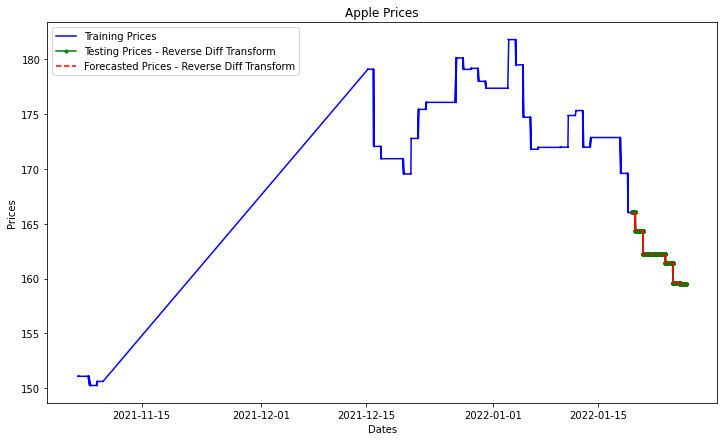

In [46]:
plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_series, color='blue', label='Training Prices')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Prices - Reverse Diff Transform')
plt.plot(reverse_test_diff_series, color='red', linestyle='--', label='Forecasted Prices - Reverse Diff Transform')
plt.legend();

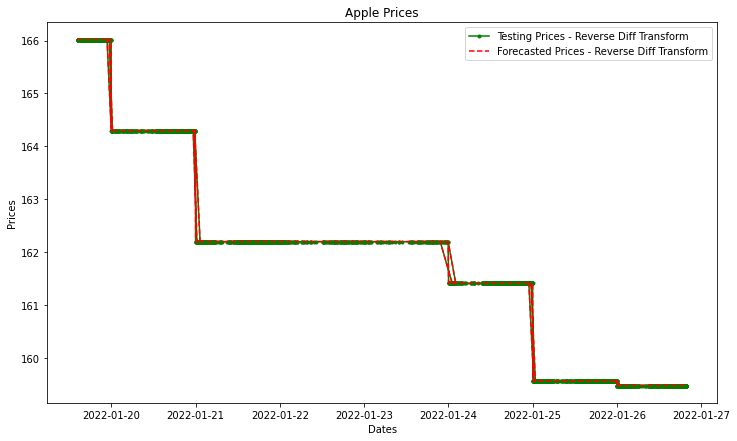

In [47]:
plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
#plt.plot(train_series, color='blue', label='Training Prices')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Prices - Reverse Diff Transform')
plt.plot(reverse_predictions_series, color='red', linestyle='--', label='Forecasted Prices - Reverse Diff Transform')
plt.legend();